In [1]:
import pandas as pd
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

array([[54, 55, 53, ..., 74, 74, 75],
       [62, 62, 61, ..., 67, 67, 69],
       [65, 66, 63, ..., 58, 57, 57],
       ...,
       [31, 32, 32, ..., 40, 38, 39],
       [33, 33, 32, ..., 40, 43, 42],
       [33, 33, 33, ..., 40, 41, 37]], dtype=uint8)

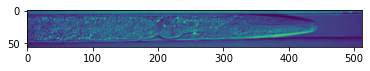

In [2]:
img = cv2.imread("D:/Kano_lab/Igor_test/PCA_test/entropy_test/Experiment-132.png", 0)
plt.imshow(img)
img

In [3]:
# 初期化
histgram = [0]*256
x = img.shape[1]
y = img.shape[0]
for i in range(y):
    for j in range(x):
        histgram[img[i, j]] += 1

256

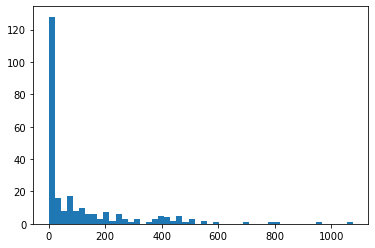

In [4]:
plt.hist(histgram, bins = 50)
len(histgram)

エントロピー：6.582272883134384


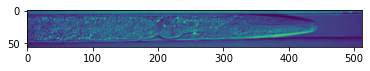

In [5]:
import math
size = img.shape[0] * img.shape[1]
entropy = 0
for i in range(256):
    # レベルiの出現確率p
    p = histgram[i]/size
    if p == 0:
        continue
    entropy -= p*math.log2(p)
plt.imshow(img)
print('エントロピー：{}'.format(entropy))

In [6]:
import pandas as pd
testdata = pd.read_csv("D:/Kano_lab/Igor_test/PCA_test/beads/imchi3_2d.csv").values

In [7]:
testdata.shape

(1081, 1681)

In [8]:
testdata

array([[-0.20421837, -0.24845229, -0.02532144, ..., -0.34161428,
        -0.40087059, -0.48405746],
       [-0.22058746, -0.21554145, -0.07372421, ..., -0.38066095,
        -0.43528515, -0.48977274],
       [-0.22187668, -0.24274255, -0.090887  , ..., -0.39206624,
        -0.47402576, -0.50943017],
       ...,
       [ 0.13302584, -0.06278104,  0.03178539, ...,  0.18061425,
         0.11505107,  0.17145239],
       [ 0.1083897 , -0.06755924,  0.03114426, ...,  0.20418842,
         0.1490332 ,  0.12836523],
       [ 0.07827309, -0.04499729,  0.01624061, ...,  0.19034153,
         0.16047381,  0.16127715]])

In [9]:
testdata[0].shape

(1681,)

In [10]:
len(testdata)


1081

In [24]:
def normalization(data_array):
    """
    normalize the data array withing 0~255
    :param data_array: numpy array
    :return: data_array: numpy array (overwrite)
    """
    amin = np.amin(data_array)
    amax = np.amax(data_array)
    scale = 255.0 / (amax - amin)
    data_array = data_array - amin
    data_array = data_array * scale
    data_array = np.uint8(data_array)
    return data_array

def calc_entropy(tempdata):
    """
    :param tempdata: numpy array
    :return: entropy: float32, entropy value (shannon's entropy) of input array
    """
    tempdata = tempdata
    histgram = [0] * 256
    # normalization
    tempdata = normalization(tempdata)

    for i in range(tempdata.shape[0]):
        for j in range(tempdata.shape[1]):
            histgram[tempdata[i, j]] += 1
    entropy = 0
    for i in range(256):
        p = histgram[i] / (tempdata.shape[0] * tempdata.shape[1])
        if p == 0:
            continue
        entropy -= p * math.log2(p)
    return entropy

In [25]:
tempdata = cv2.imread("C:/Users/Shinichi/Downloads/07DZW.png", 0)
tempdata
calc_entropy(tempdata)

7.078116076904118